# **Machine Learning2**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## Load Data

In [2]:
df = pd.read_csv('data/house_pricing_feature2.csv', sep=',')
pd.options.display.max_columns = None   #para que muestren todas las columnas
df.head()

,LotArea,LandSlope,YearBuilt,YearRemodAdd,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,OpenPorchSF,EnclosedPorch,PoolArea,SalePrice,C (all),FV,RH,RL,RM,1.5Fin,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Flat,Gable,Gambrel,Hip,Mansard,Shed,BrkTil,CBlock,PConc,Slab,Stone,Wood,Floor,GasA,GasW,Grav,OthW,Wall,N,Y,FuseA,FuseF,FuseP,Mix,SBrkr,Sbrkr,0,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd
0,8450,0.0,2003,2003,1710,1,2,3,1,8,0,2003.0,2.0,2,548,0.0,61,0,0,208500,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1,9600,0.0,1976,1976,1262,0,2,3,1,6,1,1976.0,2.0,2,460,0.0,0,0,0,181500,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
2,11250,0.0,2001,2002,1786,1,2,3,1,6,1,2001.0,2.0,2,608,0.0,42,0,0,223500,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
3,9550,0.0,1915,1970,1717,1,1,3,1,7,1,1998.0,1.0,3,642,0.0,35,272,0,140000,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
4,14260,0.0,2000,2000,2198,1,2,4,1,9,1,2000.0,2.0,3,836,0.0,84,0,0,250000,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0


## Train / Test

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Cross-validation

In [18]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer

In [19]:
# Declare KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf2 = KFold(n_splits=10, shuffle=True, random_state=42)

In [20]:
# Declare scores to be used
scoring = {
    'MSE': make_scorer(mean_squared_error),
    'MAE': make_scorer(mean_absolute_error),
}

## Baseline

In [21]:
from sklearn.dummy import DummyRegressor

In [22]:
print("----------------------------- (k = 5)")

bl = DummyRegressor(strategy='mean')
cv_results = cross_validate(bl, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 10)")

cv_results = cross_validate(bl, X_train, y_train, cv=kf2,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

----------------------------- (k = 5)
Train MSE: 5964081937.8
Validation MSE: 5967175123.2

Train MAE: 56304.3
Validation MAE: 56318.2
----------------------------- (k = 10)
Train MSE: 5964292552.4
Validation MSE: 5968037858.5

Train MAE: 56306.5
Validation MAE: 56309.7


## Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [24]:
print("----------------------------- (k = 5)")

lr = LinearRegression()
cv_results = cross_validate(lr, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))



print("----------------------------- (k = 10)")

cv_results = cross_validate(lr, X_train, y_train, cv=kf2,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))


----------------------------- (k = 5)
Train MSE: 1323557741.6
Validation MSE: 1551122139.5

Train MAE: 23115.1
Validation MAE: 24820.7
----------------------------- (k = 10)
Train MSE: 1334193897.7
Validation MSE: 1554825911.3

Train MAE: 23164.8
Validation MAE: 24786.5


In [25]:
# Podemos ver que en k = 10 nos da valores mas bajos, y compradado con el baseline hemos mejorado bastante.

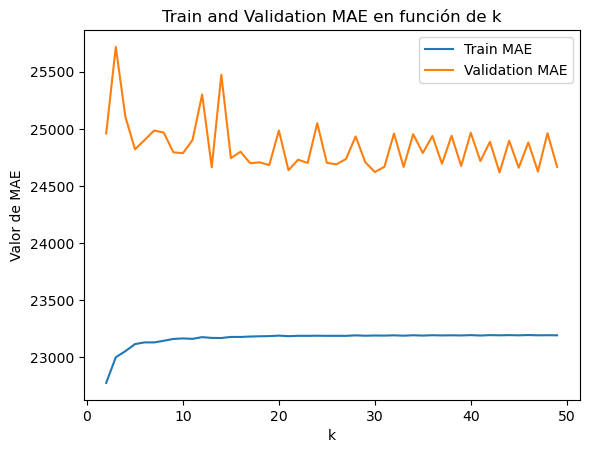

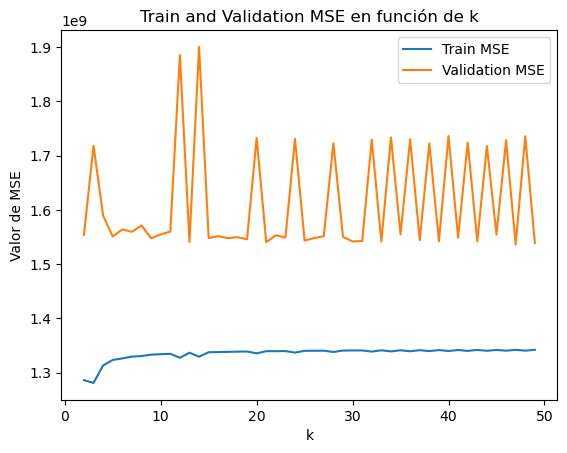

In [13]:
list_train_MSE = []
list_vali_MSE = []
list_train_MAE = []
list_vali_MAE = []

k_values = list(range(2, 50))

for i in k_values:
    kf = KFold(n_splits=i, shuffle=True, random_state=42)
    lr = LinearRegression()
    cv_results = cross_validate(lr, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)
    
    list_train_MSE.append(cv_results['train_MSE'].mean().round(1))
    list_vali_MSE.append(cv_results['test_MSE'].mean().round(1))
    list_train_MAE.append(cv_results['train_MAE'].mean().round(1))
    list_vali_MAE.append(cv_results['test_MAE'].mean().round(1))


plt.plot(k_values, list_train_MAE, label='Train MAE')
plt.plot(k_values, list_vali_MAE, label='Validation MAE')
plt.xlabel('k')
plt.ylabel('Valor de MAE')
plt.title('Train and Validation MAE en función de k')
plt.legend()
plt.show()

plt.plot(k_values, list_train_MSE, label='Train MSE')
plt.plot(k_values, list_vali_MSE, label='Validation MSE')
plt.xlabel('k')
plt.ylabel('Valor de MSE')
plt.title('Train and Validation MSE en función de k')
plt.legend()
plt.show()

In [ ]:
# Observamos que en valor 5 ya se empieza a estabilizar, aunque hay dos picos, y con esta distribucion random parece que los pares e impares va dando picos

## k-Nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsRegressor

In [27]:
# kNN model with 5 neighbors and Euclidean distance

knn = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5, p=2, n_jobs=-1))
])

knn2 = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=3, p=2, n_jobs=-1))
])



print("----------------------------- (k = 5) euclidiana (n = 5)")

cv_results = cross_validate(knn, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 10) euclidiana (n = 5)")

cv_results = cross_validate(knn, X_train, y_train, cv=kf2,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 5) euclidiana (n = 3)")

cv_results = cross_validate(knn2, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 10) euclidiana (n = 3)")

cv_results = cross_validate(knn2, X_train, y_train, cv=kf2,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))


----------------------------- (k = 5) euclidiana (n = 5)
Train MSE: 1250807094.3
Validation MSE: 1658630698.9

Train MAE: 21672.8
Validation MAE: 25905.8
----------------------------- (k = 10) euclidiana (n = 5)
Train MSE: 1232178223.9
Validation MSE: 1726695164.0

Train MAE: 21462.1
Validation MAE: 26228.8
----------------------------- (k = 5) euclidiana (n = 3)
Train MSE: 991917342.3
Validation MSE: 1815958378.1

Train MAE: 19058.6
Validation MAE: 27128.6
----------------------------- (k = 10) euclidiana (n = 3)
Train MSE: 974671023.4
Validation MSE: 1834274593.4

Train MAE: 18921.6
Validation MAE: 27352.6


In [ ]:
# Aqui podemos ver que en k = 5 y n = 5 es donde tenemos un validation MAE mas pequeño

In [28]:
knn = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5, p=1, n_jobs=-1))
])

knn2 = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=3, p=1, n_jobs=-1))
])

print("----------------------------- (k = 5) manhattan (n = 5)")

cv_results = cross_validate(knn, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 10) manhattan (n = 5)")

cv_results = cross_validate(knn, X_train, y_train, cv=kf2,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 5) manhattan (n = 3)")

cv_results = cross_validate(knn2, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

print("----------------------------- (k = 10) manhattan (n = 3)")

cv_results = cross_validate(knn2, X_train, y_train, cv=kf2,
                            scoring=scoring, return_train_score=True)

print('Train MSE:', cv_results['train_MSE'].mean().round(1))
print('Validation MSE:', cv_results['test_MSE'].mean().round(1))
print()
print('Train MAE:', cv_results['train_MAE'].mean().round(1))
print('Validation MAE:', cv_results['test_MAE'].mean().round(1))

----------------------------- (k = 5) manhattan (n = 5)
Train MSE: 1056168453.3
Validation MSE: 1586778464.6

Train MAE: 19905.5
Validation MAE: 24745.8
----------------------------- (k = 10) manhattan (n = 5)
Train MSE: 1039724871.2
Validation MSE: 1554019882.3

Train MAE: 19782.3
Validation MAE: 24578.6
----------------------------- (k = 5) manhattan (n = 3)
Train MSE: 802412127.5
Validation MSE: 1649560139.9

Train MAE: 17408.3
Validation MAE: 25551.6
----------------------------- (k = 10) manhattan (n = 3)
Train MSE: 798112202.7
Validation MSE: 1558427716.9

Train MAE: 17379.2
Validation MAE: 25096.8


In [ ]:
# En Manhattan podemos ver que en k = 5 y n = 5 nos da el valor mas pequeño en validation MAE, manhattan nos da mejor que la euclidiana 
# y mejor por poco que la linear regression.

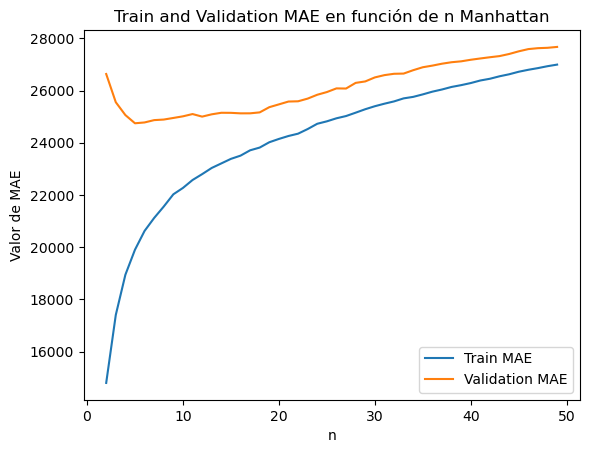

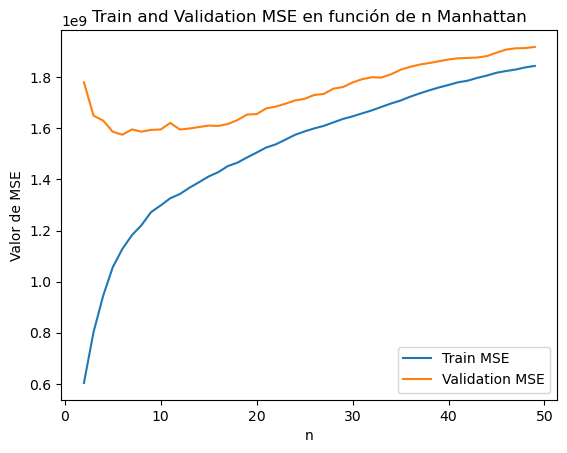

In [29]:
n_values = list(range(2, 50))

list_train_MSE = []
list_vali_MSE = []
list_train_MAE = []
list_vali_MAE = []

for i in n_values:
    knn = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=i, p=1, n_jobs=-1))
    ])

    cv_results = cross_validate(knn, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)


    list_train_MSE.append(cv_results['train_MSE'].mean().round(1))
    list_vali_MSE.append(cv_results['test_MSE'].mean().round(1))
    list_train_MAE.append(cv_results['train_MAE'].mean().round(1))
    list_vali_MAE.append(cv_results['test_MAE'].mean().round(1))

plt.plot(n_values, list_train_MAE, label='Train MAE')
plt.plot(n_values, list_vali_MAE, label='Validation MAE')
plt.xlabel('n')
plt.ylabel('Valor de MAE')
plt.title('Train and Validation MAE en función de n Manhattan')
plt.legend()
plt.show()

plt.plot(n_values, list_train_MSE, label='Train MSE')
plt.plot(n_values, list_vali_MSE, label='Validation MSE')
plt.xlabel('n')
plt.ylabel('Valor de MSE')
plt.title('Train and Validation MSE en función de n Manhattan')
plt.legend()
plt.show()


In [ ]:
# Desde manhattan que, por las primeras pruebas vemos que va mejor a nuestro machine learning, podemos ver que en n = 5 
# es cuando nuestro validation tiene el valor mas pequeño, todo en  k = 5

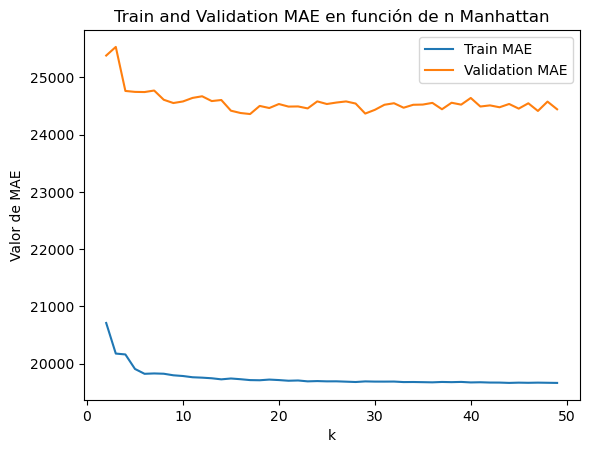

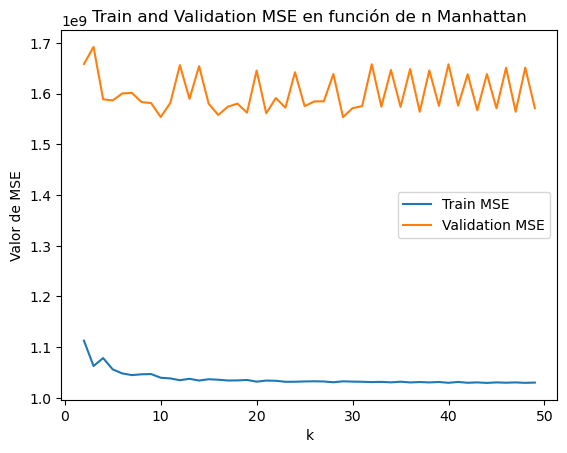

In [30]:
k_values = list(range(2, 50))

list_train_MSE = []
list_vali_MSE = []
list_train_MAE = []
list_vali_MAE = []

knn = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5, p=1, n_jobs=-1))
    ])

for i in k_values:
    kf = KFold(n_splits=i, shuffle=True, random_state=42)
    cv_results = cross_validate(knn, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)


    list_train_MSE.append(cv_results['train_MSE'].mean().round(1))
    list_vali_MSE.append(cv_results['test_MSE'].mean().round(1))
    list_train_MAE.append(cv_results['train_MAE'].mean().round(1))
    list_vali_MAE.append(cv_results['test_MAE'].mean().round(1))

plt.plot(k_values, list_train_MAE, label='Train MAE')
plt.plot(k_values, list_vali_MAE, label='Validation MAE')
plt.xlabel('k')
plt.ylabel('Valor de MAE')
plt.title('Train and Validation MAE en función de n Manhattan')
plt.legend()
plt.show()

plt.plot(k_values, list_train_MSE, label='Train MSE')
plt.plot(k_values, list_vali_MSE, label='Validation MSE')
plt.xlabel('k')
plt.ylabel('Valor de MSE')
plt.title('Train and Validation MSE en función de n Manhattan')
plt.legend()
plt.show()

In [ ]:
# Observamos que con una n = 5, a partir de k = 5 tambien es cuando se empieza a estabilizar la grafica, y en k = 10 es el
# punto mas bajo, a partir de ahi si es par o impar va dando picos hacia arriba y abajo

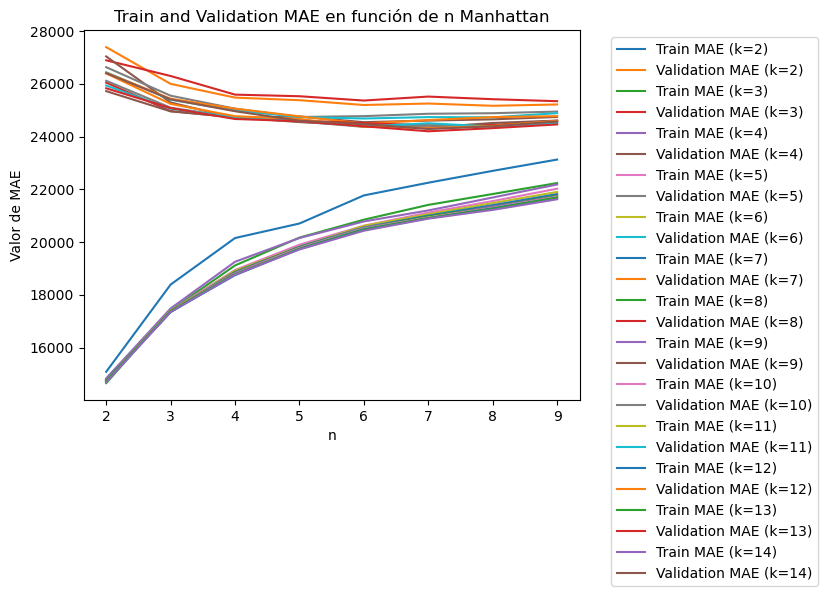

In [22]:
k_values = list(range(2, 15))
n_values = list(range(2, 10))

list_train_MAE_all = []
list_vali_MAE_all = []

for i in k_values:

    list_train_MSE = []
    list_vali_MSE = []
    list_train_MAE = []
    list_vali_MAE = []
    
    for j in n_values:

        knn = Pipeline([
            ('scale', StandardScaler()),
            ('knn', KNeighborsRegressor(n_neighbors=j, p=1, n_jobs=-1))
        ])

        kf = KFold(n_splits=i, shuffle=True, random_state=42)
        cv_results = cross_validate(knn, X_train, y_train, cv=kf,
                            scoring=scoring, return_train_score=True)

        list_train_MSE.append(cv_results['train_MSE'].mean().round(1))
        list_vali_MSE.append(cv_results['test_MSE'].mean().round(1))
        list_train_MAE.append(cv_results['train_MAE'].mean().round(1))
        list_vali_MAE.append(cv_results['test_MAE'].mean().round(1))
    
    list_train_MAE_all.append(list_train_MAE)
    list_vali_MAE_all.append(list_vali_MAE)

plt.figure()

for i, k_value in enumerate(k_values):
    plt.plot(n_values, list_train_MAE_all[i], label=f'Train MAE (k={k_value})')
    plt.plot(n_values, list_vali_MAE_all[i], label=f'Validation MAE (k={k_value})')

plt.xlabel('n')
plt.ylabel('Valor de MAE')
plt.title('Train and Validation MAE en función de n Manhattan')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
'''
Habiendo ya obserbado todos los casos en que hemos hecho pruebas, podemos asegurar que nuestra mejor opcion que mejor nos va es la de knn
con manhattan, ya que es la que nos da un validation error mucho mas bajo, que llega a ser unos 24578.6 euros de diferencia, con k = 10 y n = 5.
k = 10 es que valida 10 veces en el cross validation
n = 5 es que le va mejor coger los 5 vecinos solamente en vez de mas
Comparando los datasets que tenemos, el "house_pricing_feature.csv" nos da un MAE mas pequeño, entonces es mejor que con este dataset.
En el primer dataset el MAE es 23095.9 comparado con este que es 24578.6
'''